In [1]:

#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:

#hide
from fastbook import *
from fastai.vision.widgets import *

In [6]:

key = os.environ.get('AZURE_SEARCH_KEY', '5876dfe3f6674e25bd1ff18950daf63c')

In [7]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [8]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

150

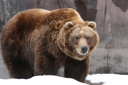

In [10]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

im = Image.open(dest)
im.to_thumb(128,128)

In [12]:

bear_types = 'grizzly','black','teddy'
path = Path('bears')
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [13]:

fns = get_image_files(path)
fns

(#423) [Path('bears/grizzly/e3aad709-6b52-4c3f-8170-e90d46d480b5.jpg'),Path('bears/grizzly/5885bab7-f275-483a-a382-35d2e04d5a12.jpg'),Path('bears/grizzly/3cfa9b87-0243-4638-97ba-25ec82929072.jpg'),Path('bears/grizzly/bdec67e6-b8cc-45f3-ad32-6a688c9aaa4c.jpg'),Path('bears/grizzly/558bb07b-96fe-41b9-b7f8-d311e9951180.jpg'),Path('bears/grizzly/b25cc7a8-b1b0-45ce-ac57-97d74613ce25.jpg'),Path('bears/grizzly/d96d2886-118c-42bb-9ac1-6823e95530c5.jpg'),Path('bears/grizzly/f5230e89-9f4b-40a0-aef6-468829861961.jpg'),Path('bears/grizzly/da6ea902-40cb-47fd-b29c-921b048e82f6.jpg'),Path('bears/grizzly/667dbf3c-b422-4c26-927b-cf1a6c4f10ac.jpg')...]

In [14]:
failed = verify_images(fns)
failed

(#28) [Path('bears/grizzly/558bb07b-96fe-41b9-b7f8-d311e9951180.jpg'),Path('bears/grizzly/6c847890-50ee-4251-8e14-5398a37f4d10.JPG'),Path('bears/grizzly/c4c349ef-34c6-47f1-abb4-9f24adb3e359.jpg'),Path('bears/grizzly/d1a0fe99-ae8d-4389-b0c8-754f7d309a5b.jpg'),Path('bears/grizzly/2bc3cba1-93ea-49ca-99f0-4386d0816945.jpg'),Path('bears/grizzly/ae6d3e87-9bbc-4b96-be80-b868a106ee4c.jpg'),Path('bears/grizzly/b421886c-6050-425b-9e52-a89224a45e05.jpg'),Path('bears/grizzly/d1f1a2ae-4f8e-4852-9e25-90402b5e97cc.JPG'),Path('bears/grizzly/09ef39b0-684e-44e8-a42f-3d0a7400f1aa.jpg'),Path('bears/grizzly/05e3a9c0-7f5b-4a3b-82ba-cc3466b09ff2.jpg')...]

In [15]:
failed.map(Path.unlink);


In [16]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

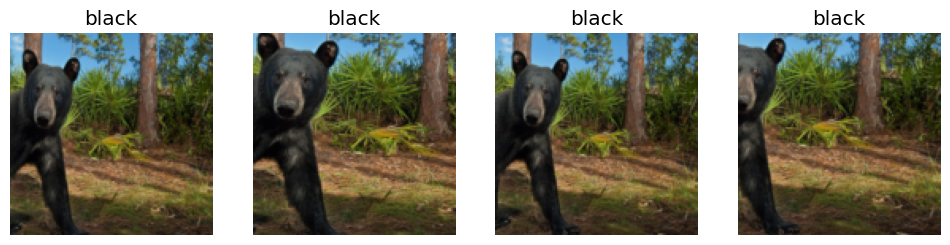

In [19]:

bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [20]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


epoch,train_loss,valid_loss,error_rate,time
0,1.338406,0.351311,0.088608,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.393428,0.294250,0.063291,00:17
1,0.341079,0.269184,0.063291,00:15
2,0.275177,0.226622,0.050633,00:15
3,0.220045,0.201997,0.050633,00:15


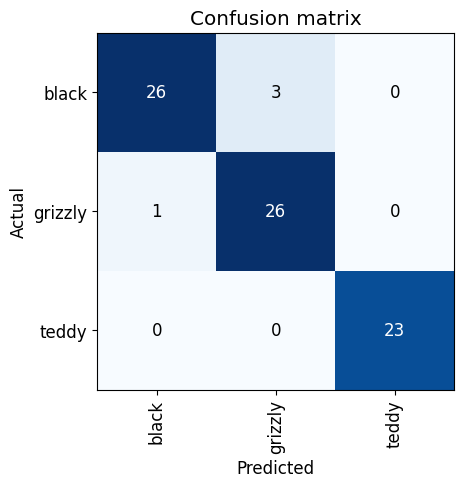

In [21]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [22]:
learn.export()


In [23]:

#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [24]:

img = PILImage.create(btn_upload.data[-1])

In [26]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [29]:
learn_inf = load_learner('export.pkl')
pred,pred_idx,probs = learn_inf.predict(img)


In [30]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

In [ ]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [32]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [33]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [34]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [37]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook run server troubleshoot trust

Jupyter command `jupyter-serverextension` not found.
